In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.
In this notebook, you will load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [5]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [6]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

<AxesSubplot:xlabel='Date'>

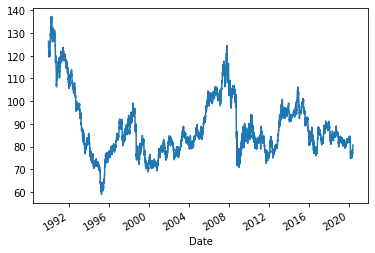

In [7]:
# Plot just the "Price" column from the dataframe:
cad_jpy_df.Price.plot()

**Question:** Do you see any patterns, long-term and/or short? 

**Answer:** The graph does not show a general trend; however, the price shows a downward trend in the last 5 years and the price may continue reduce in the short and mid-term. The long-term behaviour of the price may be similar as in the prior 20 years with ups and downs. 

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the exchange rate price into trend and noise.

In [15]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
price_noise, price_trend = sm.tsa.filters.hpfilter(cad_jpy_df["Price"])

In [16]:
price_noise_df = price_noise
price_trend_df = price_trend

In [20]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
all_price_df = pd.concat([cad_jpy_df[["Price"]], price_noise_df, price_trend_df], axis="columns", join="inner")
all_price_df.head()

,Price,Price_cycle,Price_trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


<AxesSubplot:xlabel='Date'>

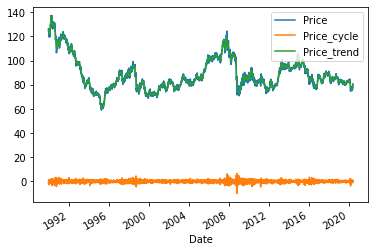

In [21]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
all_price_df.plot()

**Question:** Do you see any patterns, long-term and/or short?

**Answer:** YOUR ANSWER HERE

<AxesSubplot:xlabel='Date'>

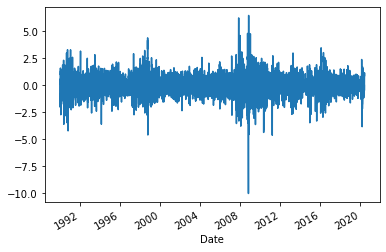

In [9]:
# Plot the Settle Noise
price_noise.plot()

<AxesSubplot:xlabel='Date'>

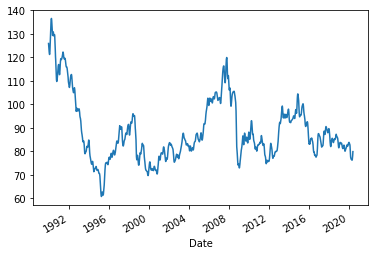

In [10]:
price_trend.plot()

---

# Forecasting Returns using an ARMA Model

Using exchange rate *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [26]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [22]:
# Estimate and ARMA model using statsmodels (use order=(2, 1))
#import statsmodels.api as sm
#from statsmodels.tsa.arima.model import ARIMA
#model = sm.tsa.ARIMA(returns, order=(2,0,1))

# Fit the model and assign it to a variable called results
#results = model.fit()

In [23]:
# Output model summary results:
#results.summary()

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


<AxesSubplot:title={'center':'5 Day Returns Forecast'}>

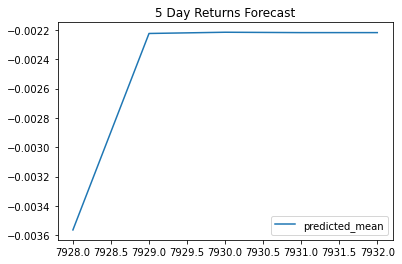

In [20]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(results.forecast(steps=5)).plot(title="5 Day Returns Forecast")
#pd.DataFrame(results.forecast(steps=5)[0]).plot(title="5 Day Futures Price Forecast")

**Question:** Based on the p-value, is the model a good fit?

**Answer:** The ARMA not to be completed, as confirmed with the professor. The ARMA model has been removed.

---

# Forecasting the Exchange Rate Price using an ARIMA Model

 1. Using the *raw* CAD/JPY exchange rate price, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Plot a 5 day forecast for the Exchange Rate Price. What does the model forecast predict will happen to the Japanese Yen in the near term?

In [27]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
model = sm.tsa.arima.ARIMA(returns['Price'], order=(5, 1, 1))

# Fit the model
results = model.fit()

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -9754.288
Date:                Sat, 06 Aug 2022   AIC                          19522.577
Time:                        23:33:09   BIC                          19571.423
Sample:                             0   HQIC                         19539.304
                               - 7928                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0302      0.007     -4.357      0.000      -0.044      -0.017
ar.L2         -0.0026      0.007     -0.393      0.694      -0.016       0.010
ar.L3         -0.0102      0.008     -1.282      0.200      -0.026       0.005
ar.L4          0.0015      0.007      0.220      0.825      -0.012       0.015
ar.L5         -0.0188      0.007     -2.724      0.006      -0.032      -0.005
ma.L1         -1.0000      0.008   -121.043      0.000      -1.016      -0.984
sigma2         0.6849      0.009     80.181      0.000       0.668       0.702
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11612.88
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Output model summary results:
results.summary()

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


<AxesSubplot:title={'center':'5 Day Futures Price Forecast'}>

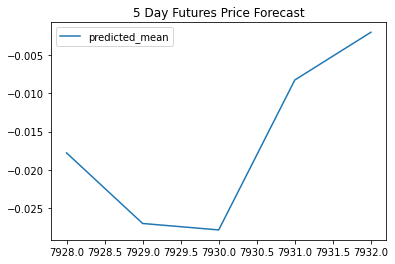

In [24]:
# Plot the 5 Day Price Forecast
pd.DataFrame(results.forecast(steps=5)).plot(title="5 Day Futures Price Forecast")

** The price will go down and after will go up

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen exchange rate returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using exchange rate *Returns*, estimate a GARCH model. **Hint:** You can reuse the `returns` variable from the ARMA model section.

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [27]:
import arch as arch
from arch import arch_model

In [28]:
# Estimate a GARCH model:
model =arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

# Fit the model
res = model.fit(disp="off")

In [29]:
# Summarize the model results
res.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Thu, Aug 04 2022   Df Residuals:                     7928
Time:                        15:07:43   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0

**Note:** Our p-values for GARCH and volatility forecasts tend to be much lower than our ARMA/ARIMA return and price forecasts. In particular, here we have all p-values of less than 0.05, except for alpha(2), indicating overall a much better model performance. In practice, in financial markets, it's easier to forecast volatility than it is to forecast returns or prices. (After all, if we could very easily predict returns, we'd all be rich!)

In [30]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [33]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = res.forecast(start='2020-06-04', horizon=forecast_horizon)
forecasts

In [34]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566029,12.573718,12.581301,12.588778,12.596153


In [35]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566029
h.2,12.573718
h.3,12.581301
h.4,12.588778
h.5,12.596153


<AxesSubplot:>

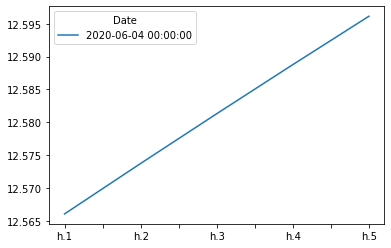

In [36]:
# Plot the final forecast
final.plot()

**Question:** What does the model forecast will happen to volatility in the near term?

**Answer:** The chart shows that volatility for the yen is expected to rise

---

# Conclusions

1. Based on your time series analysis, would you buy the yen now?

    * No, not in the next 2 days but yes in the next 3 days

2. Is the risk of the yen expected to increase or decrease?
    * The risk is expected to increase as per the volatility graph

3. Based on the model evaluation, would you feel confident in using these models for trading?
    * Not the ARIMA model because its p values